**Problem Statement: Loan Eligibility Prediction using Machine Learning**

**Background:**
Financial institutions receive numerous loan applications every day. Assessing the creditworthiness of applicants is a critical task to minimize financial risk and ensure fair lending. Traditional loan approval processes often rely on manual evaluation, which can be time-consuming and prone to human bias.

**Objective:**
The goal of this project is to develop a machine learning model that can accurately predict whether a loan application should be approved or rejected based on applicant-specific features such as income, employment status, credit history, loan amount, and other demographic or financial indicators provided in the dataset Loan_Data.csv.

Importing Libraries

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style

importing data

In [62]:
df=pd.read_csv("/content/Loan_Data.csv")

EDA

In [63]:
df.shape

(801, 14)

In [64]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Date
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y,10-11-2025
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,11-11-2025
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,10-11-2025
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,12-12-2025
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,09-11-2025


In [65]:
df=df.drop('Loan_ID',axis=1)

In [66]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Date
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y,10-11-2025
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,11-11-2025
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,10-11-2025
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,12-12-2025
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,09-11-2025


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
 12  Date               614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 81.5+ KB


In [68]:
df.describe(include="all")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Date
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2,9
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y,01-02-2025
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422,112
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN,NaN


unique values for categorical variables

In [69]:
for column in df.columns:
  if df[column].dtype=='object':
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

GENDER :  2
Gender
Female    112
Male      489
Name: count, dtype: int64


MARRIED :  2
Married
No     213
Yes    398
Name: count, dtype: int64


DEPENDENTS :  4
Dependents
3+     51
2     101
1     102
0     345
Name: count, dtype: int64


EDUCATION :  2
Education
Not Graduate    134
Graduate        480
Name: count, dtype: int64


SELF_EMPLOYED :  2
Self_Employed
Yes     82
No     500
Name: count, dtype: int64


PROPERTY_AREA :  3
Property_Area
Rural        179
Urban        202
Semiurban    233
Name: count, dtype: int64


LOAN_STATUS :  2
Loan_Status
N    192
Y    422
Name: count, dtype: int64


DATE :  9
Date
09-11-2025     27
11-11-2025     34
06-02-2025     45
13-08-2025     48
12-12-2025     57
10-11-2025     80
28-02-2025    105
06-10-2025    106
01-02-2025    112
Name: count, dtype: int64




converting Loan_Status from 'Y'  and 'N' to boolean

In [70]:
df.Loan_Status.replace(['Y','N'],[True,False],inplace=True)

/tmp/ipython-input-3327098554.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Loan_Status.replace(['Y','N'],[True,False],inplace=True)


converting categorical to dummy variables

In [71]:
df.Loan_Status.astype("object")

,Loan_Status
0,True
1,False
2,True
3,True
4,True
...,...
796,NaN
797,NaN
798,NaN
799,NaN


In [72]:
df=pd.get_dummies(df,columns=['Dependents','Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'],drop_first=True)

In [73]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Date,Dependents_1,Dependents_2,Dependents_3+,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_True
0,5849.0,0.0,NaN,360.0,1.0,10-11-2025,False,False,False,True,False,False,False,False,True,True
1,4583.0,1508.0,128.0,360.0,1.0,11-11-2025,True,False,False,True,True,False,False,False,False,False
2,3000.0,0.0,66.0,360.0,1.0,10-11-2025,False,False,False,True,True,False,True,False,True,True
3,2583.0,2358.0,120.0,360.0,1.0,12-12-2025,False,False,False,True,True,True,False,False,True,True
4,6000.0,0.0,141.0,360.0,1.0,09-11-2025,False,False,False,True,False,False,False,False,True,True


In [74]:
df.drop('Date', axis=1, inplace = True)

In [75]:
df.isnull().sum()

,0
ApplicantIncome,187
CoapplicantIncome,187
LoanAmount,209
Loan_Amount_Term,201
Credit_History,237
Dependents_1,0
Dependents_2,0
Dependents_3+,0
Gender_Male,0
Married_Yes,0


imputing missing values

In [76]:
for column in df.columns:
  if df[column].dtype!='object':
    mean=df[column].mean()
    df[column]=df[column].fillna(mean)

df.isnull().sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0
Dependents_1,0
Dependents_2,0
Dependents_3+,0
Gender_Male,0
Married_Yes,0


In [77]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_True
0,5849.0,0.0,146.412162,360.0,1.0,False,False,False,True,False,False,False,False,True,True
1,4583.0,1508.0,128.000000,360.0,1.0,True,False,False,True,True,False,False,False,False,False
2,3000.0,0.0,66.000000,360.0,1.0,False,False,False,True,True,False,True,False,True,True
3,2583.0,2358.0,120.000000,360.0,1.0,False,False,False,True,True,True,False,False,True,True
4,6000.0,0.0,141.000000,360.0,1.0,False,False,False,True,False,False,False,False,True,True


In [78]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,801.000000,801.000000,801.000000,801.000000,801.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,5347.592820,2561.512199,73.562791,56.348913,0.306096
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,3155.000000,0.000000,110.000000,342.000000,0.842199
50%,4723.000000,1621.245798,146.412162,360.000000,1.000000
75%,5403.459283,1987.000000,150.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


checking for duplicates

In [79]:
dups=df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 186


In [80]:
print('Before',df.shape)
df=df.drop_duplicates()
print('After',df.shape)

Before (801, 15)
After (615, 15)


In [81]:
dups=df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


Correlation Plot

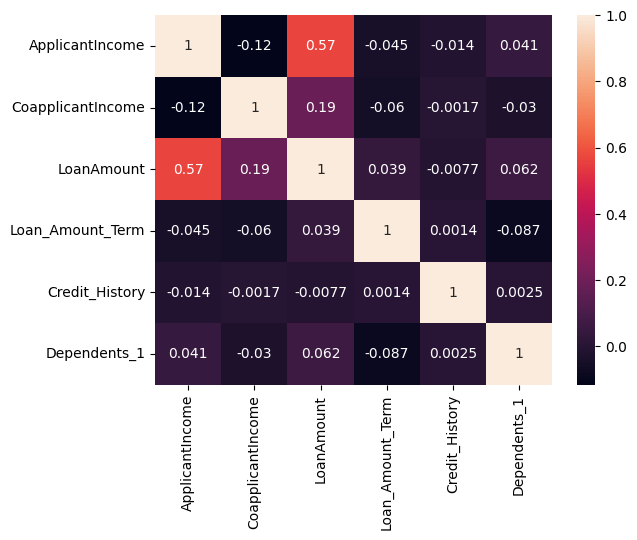

In [82]:
sns.heatmap(df.iloc[:,0:6].corr(),annot=True)
plt.show()

The variables 'ApplicantIncome','LoanAmount','Loan_Amount_Term' are having correlation with each other

In [83]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_True
0,5849.0,0.0,146.412162,360.0,1.0,False,False,False,True,False,False,False,False,True,True
1,4583.0,1508.0,128.000000,360.0,1.0,True,False,False,True,True,False,False,False,False,False
2,3000.0,0.0,66.000000,360.0,1.0,False,False,False,True,True,False,True,False,True,True
3,2583.0,2358.0,120.000000,360.0,1.0,False,False,False,True,True,True,False,False,True,True
4,6000.0,0.0,141.000000,360.0,1.0,False,False,False,True,False,False,False,False,True,True


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 0 to 614
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          615 non-null    float64
 1   CoapplicantIncome        615 non-null    float64
 2   LoanAmount               615 non-null    float64
 3   Loan_Amount_Term         615 non-null    float64
 4   Credit_History           615 non-null    float64
 5   Dependents_1             615 non-null    bool   
 6   Dependents_2             615 non-null    bool   
 7   Dependents_3+            615 non-null    bool   
 8   Gender_Male              615 non-null    bool   
 9   Married_Yes              615 non-null    bool   
 10  Education_Not Graduate   615 non-null    bool   
 11  Self_Employed_Yes        615 non-null    bool   
 12  Property_Area_Semiurban  615 non-null    bool   
 13  Property_Area_Urban      615 non-null    bool   
 14  Loan_Status_True         615 no

Outlier Checks

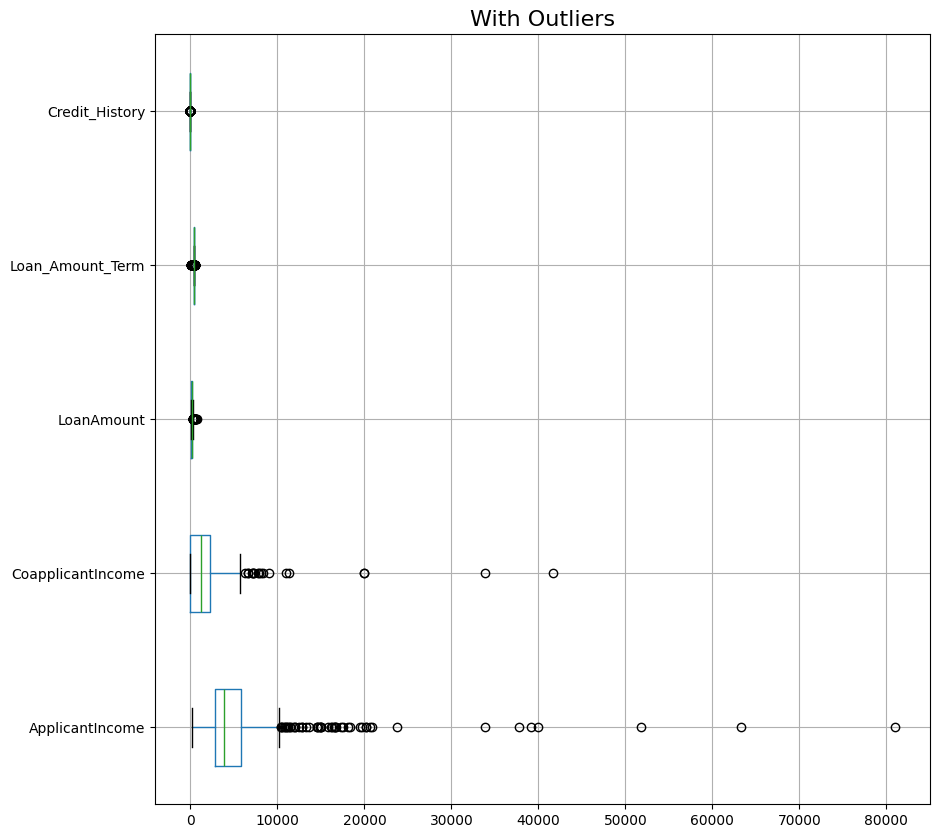

In [85]:
count=df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10,10))
df[count].boxplot(vert=False)
plt.title('With Outliers',fontsize=16)
plt.show()

In [86]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

In [90]:
for column in df[count].columns:
  lower_range,upper_range=remove_outlier(df[column])
  df[column]=np.where(df[column]>upper_range,upper_range,df[column])
  df[column]=np.where(df[column]<lower_range,lower_range,df[column])

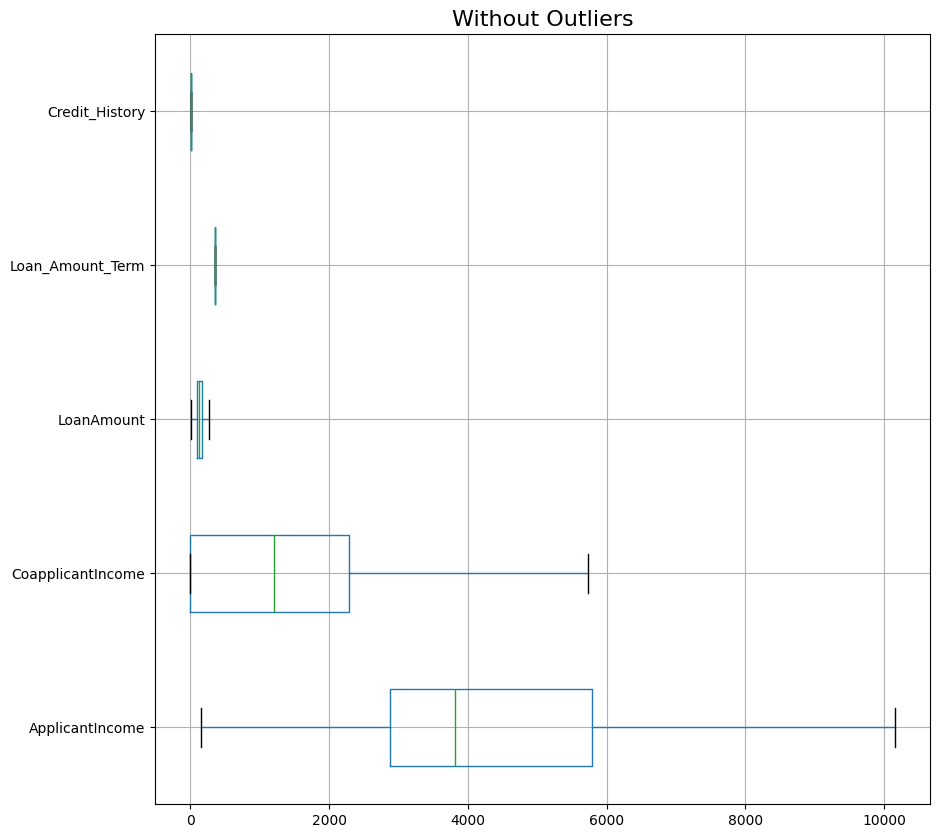

In [92]:
plt.figure(figsize=(10,10))
df[count].boxplot(vert=False)
plt.title('Without Outliers',fontsize=16)
plt.show()

Train Test Split

In [100]:
x = df.drop('Loan_Status_True', axis=1)
y = df['Loan_Status_True']

In [101]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,146.412162,360.0,1.0,False,False,False,True,False,False,False,False,True
1,4583.0,1508.0,128.000000,360.0,1.0,True,False,False,True,True,False,False,False,False
2,3000.0,0.0,66.000000,360.0,1.0,False,False,False,True,True,False,True,False,True
3,2583.0,2358.0,120.000000,360.0,1.0,False,False,False,True,True,True,False,False,True
4,6000.0,0.0,141.000000,360.0,1.0,False,False,False,True,False,False,False,False,True


In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=1)

Linear Regression Model

In [104]:
regression_model=LinearRegression()
regression_model.fit(X_train,Y_train)

LinearRegression()

coefficients for each of the independent attributes

In [105]:
for idx, col_name in enumerate(X_train.columns):
  print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for ApplicantIncome is 1.5660199933140206e-05
The coefficient for CoapplicantIncome is 1.5675303361101743e-05
The coefficient for LoanAmount is -0.0012476404292039596
The coefficient for Loan_Amount_Term is -1.3877787807814457e-17
The coefficient for Credit_History is -2.7755575615628914e-17
The coefficient for Dependents_1 is -0.05090212777377231
The coefficient for Dependents_2 is 0.0910681543264778
The coefficient for Dependents_3+ is -0.00615369446620292
The coefficient for Gender_Male is 0.02319630667714496
The coefficient for Married_Yes is 0.0932008070955005
The coefficient for Education_Not Graduate is -0.08446537985471114
The coefficient for Self_Employed_Yes is 0.04941691005797624
The coefficient for Property_Area_Semiurban is 0.12871452929790483
The coefficient for Property_Area_Urban is 0.01995461087291459


intercept for the model

In [107]:
intercept=regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.6483378149561265


R square on training data

In [108]:
regression_model.score(X_train,Y_train)

0.05201391912750075

R square on testing data

In [109]:
regression_model.score(X_test,Y_test)

0.0087365825016269

Root Mean Square Error(RMSE)

RMSE on Training data

In [111]:
predicted_train=regression_model.fit(X_train,Y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(Y_train,predicted_train))

np.float64(0.4459034775040817)

RMSE on Testing data

In [113]:
predicted_test=regression_model.fit(X_train,Y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(Y_test,predicted_test))

np.float64(0.4770597328546617)

**Conclusion**

The analysis of the Loan Data dataset gives us a clear picture of what factors matter most when it comes to getting a loan approved. From the exploration, we can see that applicant income, co-applicant income, loan amount, credit history, and education level all play an important role in loan decisions.

One of the biggest takeaways is that credit history has a strong influence — applicants with a solid credit record are much more likely to have their loans approved. Income levels also matter, as higher combined incomes tend to improve approval chances.

By applying Linear Regression, we were able to understand how these features relate to each other and how past data can be used to make reliable predictions.

In short, this project shows how machine learning and data analysis can help banks and financial institutions make smarter, faster, and fairer loan decisions, reducing risk while improving customer experience.